In [16]:
# graphing the proportion of launches by public and private companies over time (yearly)

In [17]:
# modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [18]:
df = pd.read_csv("resources/global_space_launches.csv")
# df.head()

In [19]:
df = df[::-1]
# df.head()

In [20]:
df["Private or State Run"].value_counts()

S    2931
P    1393
Name: Private or State Run, dtype: int64

In [21]:
df = df.loc[df["Year"] != 2020]

In [22]:
years = df.Year.unique()
years

array([1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [23]:
state = df.loc[df["Private or State Run"] == "S"]
private = df.loc[df["Private or State Run"] == "P"]

total_launches = []
state_list = []
private_list = []

for year in years:
    total_launches.append(len(df.loc[df["Year"] == year]))
    state_list.append(len(df.loc[(df["Year"] == year) & (df["Private or State Run"] == "S")]))
    private_list.append(len(df.loc[(df["Year"] == year) & (df["Private or State Run"] == "P")]))

launch_df = pd.DataFrame({
    "Year": years,
    "Total Launches": total_launches,
    "State Launches": state_list,
    "Private Launches": private_list
})

launch_df["State %"] = launch_df["State Launches"] / launch_df["Total Launches"] * 100
launch_df["Private %"] = launch_df["Private Launches"] / launch_df["Total Launches"] * 100

# launch_df["State %"] = launch_df["State %"].map("{:.2%}".format)
# launch_df["Private %"] = launch_df["Private %"].map("{:.2%}".format)

# launch_df

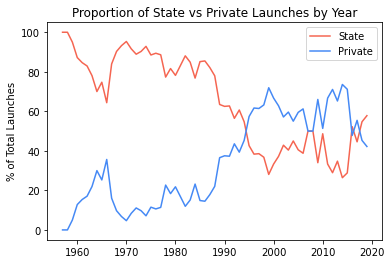

In [24]:
state_prop = launch_df["State %"]
priv_prop = launch_df["Private %"]

plt.plot(years, state_prop, color="#F56551")

plt.plot(years, priv_prop, color="#4589F5")

plt.title("Proportion of State vs Private Launches by Year")
plt.ylabel("% of Total Launches")
plt.legend(["State", "Private"])

plt.show()

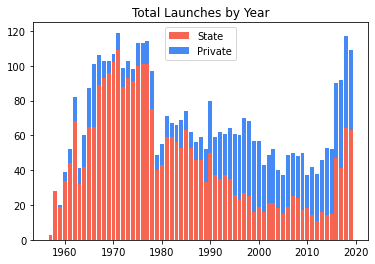

In [25]:
fig, ax = plt.subplots()

ax.bar(years, state_list, label="State", color="#F56551")
ax.bar(years, private_list, bottom=state_list, label="Private", color="#4589F5")

plt.title("Total Launches by Year")
plt.legend(["State", "Private"])

plt.show()

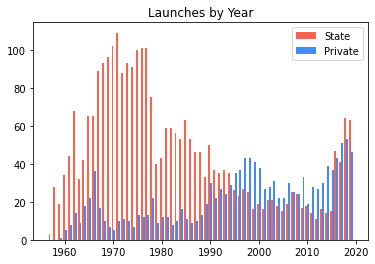

In [26]:
fig, ax = plt.subplots()

ax.bar(years - 0.2, state_list, label="State", width=0.4, color="#F56551")
ax.bar(years + 0.2, private_list, label="Private", width=0.4, color="#4589F5")

plt.title("Launches by Year")
plt.legend(["State", "Private"])

plt.show()

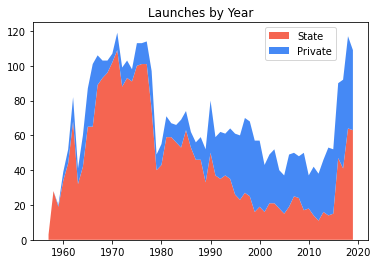

In [27]:
plt.stackplot(years, state_list, private_list, colors=["#F56551", "#4589F5"])
plt.title("Launches by Year")
plt.legend(labels=["State", "Private"], loc="best", bbox_to_anchor=(0.92,1))
# plt.axes().set_facecolor("white")
# plt.rcParams["figure.figsize"] = (30,10)
# plt.style.use("resources/space-cadets.mplstyle")


plt.show()

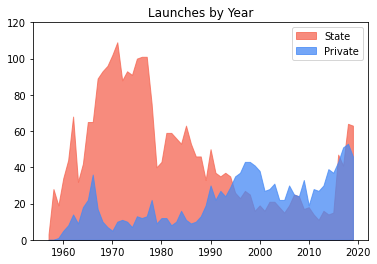

In [28]:
plt.stackplot(years, state_list, color="#F56551", alpha=0.75)
plt.stackplot(years, private_list, color="#4589F5", alpha=0.75)

plt.ylim(0,120)
plt.title("Launches by Year")
plt.legend(labels=["State", "Private"], loc="best")
# plt.axes().set_facecolor("white")
plt.rcParams["figure.figsize"] = (6,4)

plt.show()